In [1]:
%%time
from syntheticDBN2 import Bayes_Test
import pandas as pd
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
%matplotlib widget

Wall time: 3.69 s


In [2]:
data = pd.read_csv("C:/Users/jacco/Documents/University/Thesis/Data/wide_daily_nofactor2.csv").sort_values(['user_id', 'counter'], ascending = [True, True])

In [3]:
data = data[data['incomplete']!=1]
data

,counter,activity_id,user_id,prompt,date,day,neg_aff,pos_aff,annoyed,neg_thoughts,...,emo_cope,eudaimonia,anhedonia,connected,depressed,coping,sleep,rested,look_forward,incomplete
9,2,14030,44153,2,2021-12-06,1,3.361111,3.666667,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
13,3,14030,44153,3,2021-12-06,1,3.055556,2.333333,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,4,14111,44153,4,2021-12-06,1,2.722222,3.000000,1.0,1.0,...,1.0,1.0,5.0,7.0,4.0,2.0,NaN,NaN,NaN,0
10,5,14110,44153,1,2021-12-07,2,5.000000,5.000000,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,0
6,6,14030,44153,2,2021-12-07,2,5.000000,5.000000,7.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84185,330,14030,45464,2,2022-02-26,83,2.944444,3.000000,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
84066,331,14030,45464,3,2022-02-26,83,2.305556,2.666667,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
84010,332,14111,45464,4,2022-02-26,83,2.500000,2.333333,1.0,1.0,...,2.0,5.0,1.0,5.0,1.0,7.0,NaN,NaN,NaN,0
84111,337,14110,45464,1,2022-02-28,85,2.583333,2.666667,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,7.0,0


In [4]:
data = data.sort_values(['day','prompt'],ascending = [True, True])
data

,counter,activity_id,user_id,prompt,date,day,neg_aff,pos_aff,annoyed,neg_thoughts,...,emo_cope,eudaimonia,anhedonia,connected,depressed,coping,sleep,rested,look_forward,incomplete
356,1,14110,44155,1,2021-12-06,1,3.055556,2.666667,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,4.0,0
450,1,14110,44156,1,2021-12-06,1,4.166667,3.333333,2.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3.0,3.0,0
883,1,14110,44159,1,2021-12-06,1,3.527778,3.000000,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,5.0,0
996,1,14110,44160,1,2021-12-06,1,2.944444,3.000000,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,5.0,0
1228,1,14110,44161,1,2021-12-06,1,2.666667,2.333333,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82067,325,14111,44711,4,2022-02-28,85,2.916667,2.333333,1.0,2.0,...,2.0,7.0,1.0,4.0,1.0,6.0,NaN,NaN,NaN,0
82563,340,14111,44713,4,2022-02-28,85,2.555556,2.000000,2.0,3.0,...,3.0,6.0,1.0,6.0,2.0,6.0,NaN,NaN,NaN,0
83258,340,14111,44721,4,2022-02-28,85,1.500000,1.666667,1.0,1.0,...,1.0,6.0,2.0,4.0,1.0,5.0,NaN,NaN,NaN,0
83739,337,14111,44725,4,2022-02-28,85,3.166667,2.333333,1.0,4.0,...,2.0,3.0,3.0,4.0,2.0,4.0,NaN,NaN,NaN,0


In [5]:
subdata = []
for day in data['day'].unique():
    for prompt in data['prompt'].unique():
        subdata.append(data[(data["day"]==day) & (data["prompt"]==prompt)][['user_id', 'day','prompt','annoyed', 'neg_thoughts', 'relaxed', 'nervous','overwhelmed', 'stressed', 'happy', 'sad', 'motivated', 'tired']])
subdata[0]

,user_id,day,prompt,annoyed,neg_thoughts,relaxed,nervous,overwhelmed,stressed,happy,sad,motivated,tired
356,44155,1,1,1.0,2.0,4.0,3.0,2.0,3.0,5.0,1.0,4.0,5.0
450,44156,1,1,2.0,5.0,4.0,5.0,4.0,4.0,4.0,2.0,2.0,5.0
883,44159,1,1,2.0,2.0,5.0,3.0,2.0,4.0,5.0,2.0,4.0,6.0
996,44160,1,1,1.0,3.0,3.0,2.0,3.0,3.0,5.0,2.0,5.0,2.0
1228,44161,1,1,1.0,1.0,5.0,2.0,1.0,2.0,5.0,1.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82405,44712,1,1,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,6.0,6.0
83286,44721,1,1,1.0,2.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,2.0
83476,44723,1,1,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,4.0,5.0
84000,45015,1,1,2.0,6.0,2.0,6.0,5.0,7.0,3.0,5.0,5.0,5.0


# PyAgrum

In [6]:
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import pyAgrum.lib.dynamicBN as gdyn
import pyAgrum.skbn as skbn

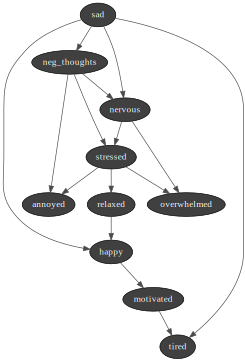

In [7]:
data = data[['annoyed', 'neg_thoughts', 'relaxed', 'nervous','overwhelmed', 'stressed', 'happy', 'sad', 'motivated', 'tired']]
data = data.dropna()

discretizer = skbn.BNDiscretizer(defaultDiscretizationMethod='uniform',defaultNumberOfBins=5,discretizationThreshold=25)

# Create nodes
template = gum.BayesNet()
for name in data:
    template.add(discretizer.createVariable(name, data[name]))

learner = gum.BNLearner(data, template)
bn = learner.learnBN()
gnb.show(bn)

In [8]:
for i in range(len(subdata)-1):
    # Force no back in time and in same timestep arcs
    discretizer = skbn.BNDiscretizer(defaultDiscretizationMethod='uniform',defaultNumberOfBins=5,discretizationThreshold=25)
    
    train = pd.merge(subdata[i], subdata[i+1],  how='outer', left_on=['user_id'], right_on = ['user_id'], suffixes=["0","1"]).drop(['user_id', 'prompt0', 'prompt1', 'day0', 'day1'], axis=1).dropna()

    # Create nodes
    template = gum.BayesNet()
    for name in train:
        template.add(discretizer.createVariable(name, train[name]))

    learner = gum.BNLearner(train, template)
    
    for name1 in train:
        for name2 in train:
            if int(name1[-1]) > int(name2[-1]):
                learner.addForbiddenArc(name1,name2)
            # if int(name1[-1]) + t < int(name2[-1]):
            #     learner.addForbiddenArc(name1,name2)
            if int(name1[-1]) == int(name2[-1]):
                learner.addForbiddenArc(name1,name2)
                
                
    bn = learner.learnBN()
    gnb.show(bn)